<a href="https://colab.research.google.com/github/MaCuur/AI_EGs/blob/main/Simple_RNN_para_aprender_la_suma_binaria_de_dos_numeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteración: 0
Error: 3.4564
Predicción: [0 0 0 0 0 0 0 1]
Verdadero: [0 1 0 0 0 1 0 1]
9 + 60 = 1
------------
Iteración: 1000
Error: 3.6339
Predicción: [1 1 1 1 1 1 1 1]
Verdadero: [0 0 1 1 1 1 1 1]
28 + 35 = 255
------------
Iteración: 2000
Error: 3.9137
Predicción: [0 1 0 0 1 0 0 0]
Verdadero: [1 0 1 0 0 0 0 0]
116 + 44 = 72
------------
Iteración: 3000
Error: 3.7219
Predicción: [1 1 0 1 1 1 1 1]
Verdadero: [0 1 0 0 1 1 0 1]
4 + 73 = 223
------------
Iteración: 4000
Error: 3.5853
Predicción: [0 0 0 0 1 0 0 0]
Verdadero: [0 1 0 1 0 0 1 0]
71 + 11 = 8
------------
Iteración: 5000
Error: 2.5335
Predicción: [1 0 1 0 0 0 1 0]
Verdadero: [1 1 0 0 0 0 1 0]
81 + 113 = 162
------------
Iteración: 6000
Error: 0.5769
Predicción: [0 1 0 1 0 0 0 1]
Verdadero: [0 1 0 1 0 0 0 1]
81 + 0 = 81
------------
Iteración: 7000
Error: 1.4259
Predicción: [1 0 0 0 0 0 0 1]
Verdadero: [1 0 0 0 0 0 0 1]
4 + 125 = 129
------------
Iteración: 8000
Error: 0.4748
Predicción: [0 0 1 1 1 0 0 0]
Verdadero: [0 0 1 1 1 

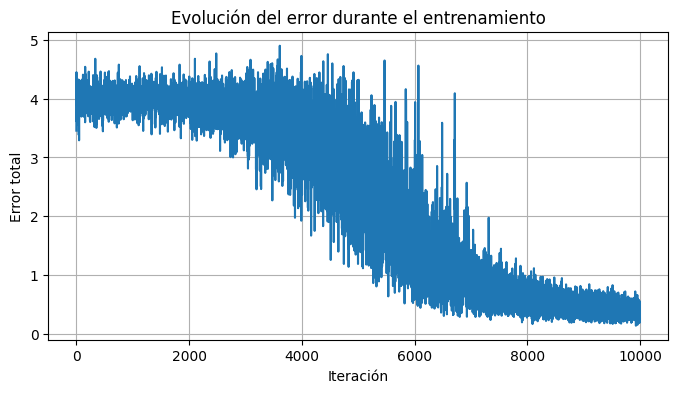

In [2]:
# ============================================================
# 🔢 Entrenamiento de una Red Neuronal Recurrente Simple (RNN)
#    para aprender la suma binaria de dos números
# ============================================================

import copy
import numpy as np
import matplotlib.pyplot as plt

# Fijar semilla aleatoria
np.random.seed(0)

# ------------------------------------------------------------
# Funciones auxiliares
# ------------------------------------------------------------
def sigmoid(x):
    """Función de activación sigmoide"""
    return 1 / (1 + np.exp(-x))

def sigmoid_output_to_derivative(output):
    """Derivada de la sigmoide"""
    return output * (1 - output)

# ------------------------------------------------------------
# Preparar datos de entrenamiento (suma binaria)
# ------------------------------------------------------------
binary_dim = 8
largest_number = pow(2, binary_dim)

# Generar representaciones binarias para los números [0, 255]
binary = np.unpackbits(
    np.array([range(largest_number)], dtype=np.uint8).T, axis=1
)

int2binary = {i: binary[i] for i in range(largest_number)}

# ------------------------------------------------------------
# Parámetros de la red
# ------------------------------------------------------------
alpha = 0.1        # tasa de aprendizaje
input_dim = 2      # entradas (bit A, bit B)
hidden_dim = 16    # neuronas ocultas
output_dim = 1     # salida (bit resultante)

# Inicialización de pesos
synapse_0 = 2 * np.random.random((input_dim, hidden_dim)) - 1
synapse_1 = 2 * np.random.random((hidden_dim, output_dim)) - 1
synapse_h = 2 * np.random.random((hidden_dim, hidden_dim)) - 1

# Inicialización de actualizaciones
synapse_0_update = np.zeros_like(synapse_0)
synapse_1_update = np.zeros_like(synapse_1)
synapse_h_update = np.zeros_like(synapse_h)

# ------------------------------------------------------------
# Entrenamiento
# ------------------------------------------------------------
epochs = 10000
error_history = []

for j in range(epochs):

    # Generar ejemplo de suma
    a_int = np.random.randint(largest_number / 2)
    b_int = np.random.randint(largest_number / 2)

    a = int2binary[a_int]
    b = int2binary[b_int]
    c_int = a_int + b_int
    c = int2binary[c_int]
    d = np.zeros_like(c)

    overallError = 0
    layer_2_deltas = []
    layer_1_values = [np.zeros(hidden_dim)]

    # Paso hacia adelante
    for position in range(binary_dim):
        X = np.array([[a[binary_dim - position - 1], b[binary_dim - position - 1]]])
        y = np.array([[c[binary_dim - position - 1]]]).T

        layer_1 = sigmoid(np.dot(X, synapse_0) + np.dot(layer_1_values[-1], synapse_h))
        layer_2 = sigmoid(np.dot(layer_1, synapse_1))

        layer_2_error = y - layer_2
        layer_2_deltas.append(layer_2_error * sigmoid_output_to_derivative(layer_2))
        overallError += np.abs(layer_2_error[0])

        d[binary_dim - position - 1] = np.round(layer_2[0][0])
        layer_1_values.append(copy.deepcopy(layer_1))

    error_history.append(np.sum(overallError))

    # Paso hacia atrás (backpropagation a través del tiempo)
    future_layer_1_delta = np.zeros(hidden_dim)
    for position in range(binary_dim):
        X = np.array([[a[position], b[position]]])
        layer_1 = layer_1_values[-position - 1]
        prev_layer_1 = layer_1_values[-position - 2]
        layer_2_delta = layer_2_deltas[-position - 1]
        layer_1_delta = (future_layer_1_delta.dot(synapse_h.T) +
                         layer_2_delta.dot(synapse_1.T)) * sigmoid_output_to_derivative(layer_1)

        synapse_1_update += np.atleast_2d(layer_1).T.dot(layer_2_delta)
        synapse_h_update += np.atleast_2d(prev_layer_1).T.dot(layer_1_delta)
        synapse_0_update += X.T.dot(layer_1_delta)

        future_layer_1_delta = layer_1_delta

    # Actualización de pesos
    synapse_0 += synapse_0_update * alpha
    synapse_1 += synapse_1_update * alpha
    synapse_h += synapse_h_update * alpha

    # Reiniciar actualizaciones
    synapse_0_update *= 0
    synapse_1_update *= 0
    synapse_h_update *= 0

    # Mostrar progreso cada 1000 iteraciones
    if j % 1000 == 0:
        out = 0
        for index, x in enumerate(reversed(d)):
            out += x * pow(2, index)
        print(f"Iteración: {j}")
        print(f"Error: {overallError.sum():.4f}")
        print(f"Predicción: {d}")
        print(f"Verdadero: {c}")
        print(f"{a_int} + {b_int} = {out}")
        print("------------")

# ------------------------------------------------------------
# Gráfica de error
# ------------------------------------------------------------
plt.figure(figsize=(8,4))
plt.plot(error_history)
plt.title("Evolución del error durante el entrenamiento")
plt.xlabel("Iteración")
plt.ylabel("Error total")
plt.grid(True)
plt.show()
